In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path

In [164]:
list(Path().glob('*.xlsx'))

[WindowsPath('spotpriser.xlsx'),
 WindowsPath('Timeverdier (1).xlsx'),
 WindowsPath('Timeverdier (3).xlsx'),
 WindowsPath('Timeverdier.xlsx')]

In [ ]:
fp = Path('Timeverdier (3).xlsx')
df = pd.read_excel(fp, skiprows=2)
df = df[['Dato', 'Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5',
       'Time 6', 'Time 7', 'Time 8', 'Time 9', 'Time 10', 'Time 11', 'Time 12',
       'Time 13', 'Time 14', 'Time 15', 'Time 16', 'Time 17', 'Time 18',
       'Time 19', 'Time 20', 'Time 21', 'Time 22', 'Time 23', 'Time 24']]
df.set_index('Dato', inplace=True)
df.columns = (df.columns.str.split(' ').str[1].astype(int) - 1).astype(str).str.zfill(2) + ':00'
ser = df.unstack().swaplevel()
ser = ser.reset_index()
ser['timestamp'] = pd.to_datetime(ser['Dato'].astype(str) + ' ' + ser['level_1'] + ':00', format='mixed')
ser.set_index('timestamp', inplace=True)
ser = ser[0].sort_index()

<Axes: xlabel='timestamp'>

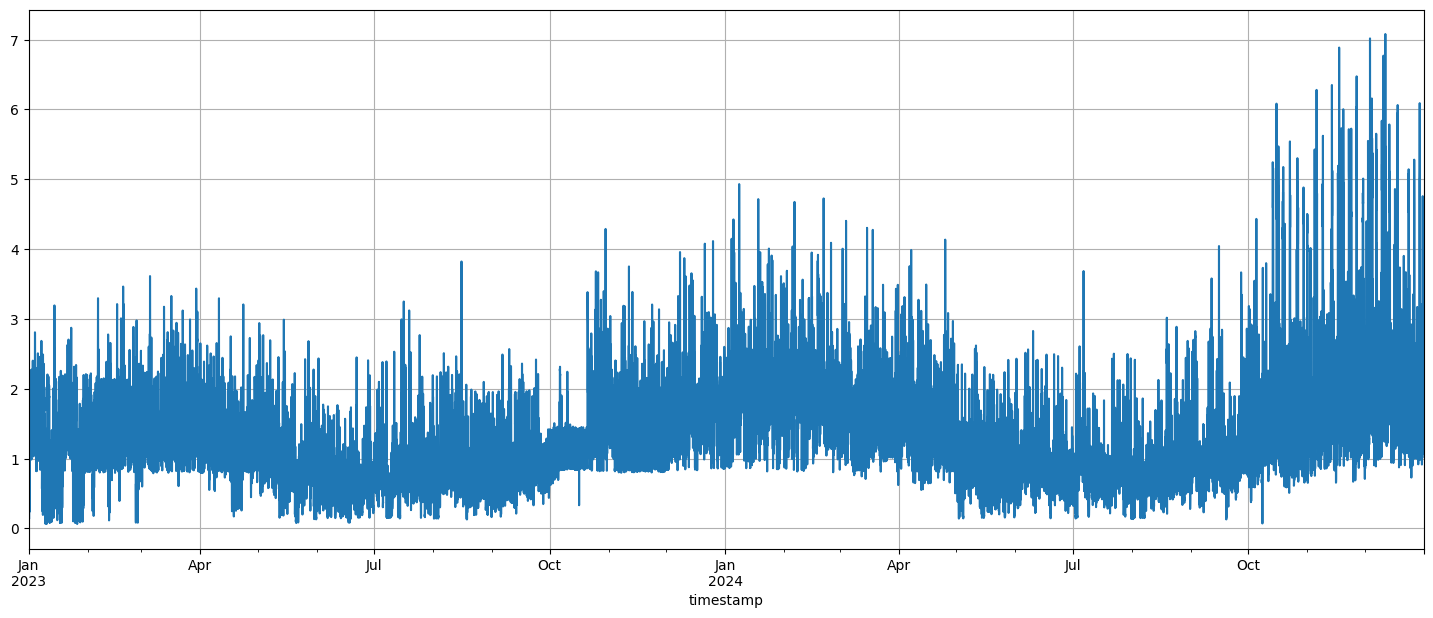

In [175]:
ser.plot(figsize=(18,7), grid=True)

In [176]:
ser.isna().sum()

np.int64(2)

In [177]:
ser.interpolate(inplace=True)

In [179]:
ser.to_excel('haakon_timeverdier_23-24.xlsx', index=True, header=False)

In [89]:
df_spot = pd.read_excel('spotpriser.xlsx')

In [103]:
df_spot['timestamp'] = pd.to_datetime(df_spot['Dato/klokkeslett'].str.split(' ').str[0] + ' ' + df_spot['Dato/klokkeslett'].str.split(' ').str[2].str.split('-').str[0] + ':00'
)

In [106]:
df_spot.set_index('timestamp', inplace=True)

In [108]:
df_spot.drop(columns=['Dato/klokkeslett'], inplace=True)

In [114]:
def strømstøtte(x, p, q):
    return np.where(x <= p, x, p + q * (x-p))

def norgespris(x, p):
    return p

<Axes: xlabel='timestamp'>

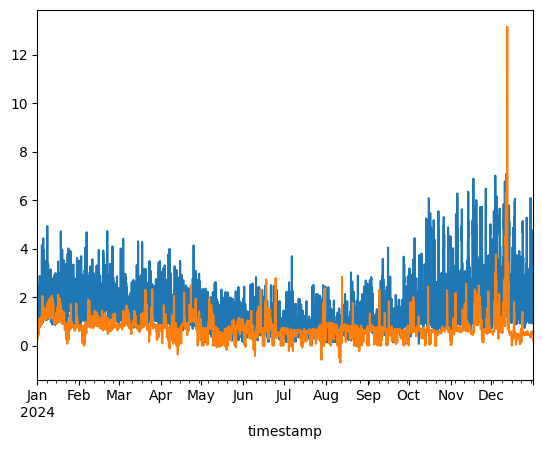

In [113]:
ser.plot()
df_spot['NO2'].plot()

In [119]:
df_strømstøtte = pd.DataFrame(strømstøtte(df_spot, 0.75, 0.1), index=df_spot.index, columns=df_spot.columns)

<Axes: xlabel='timestamp'>

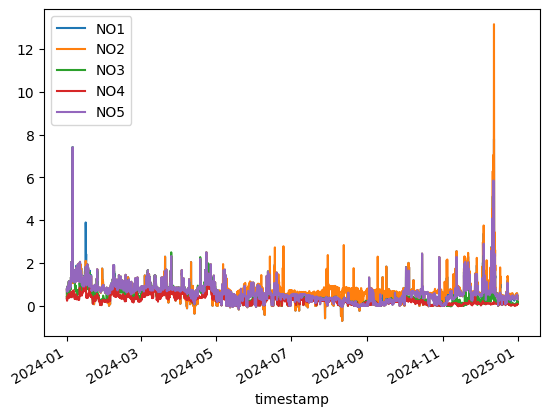

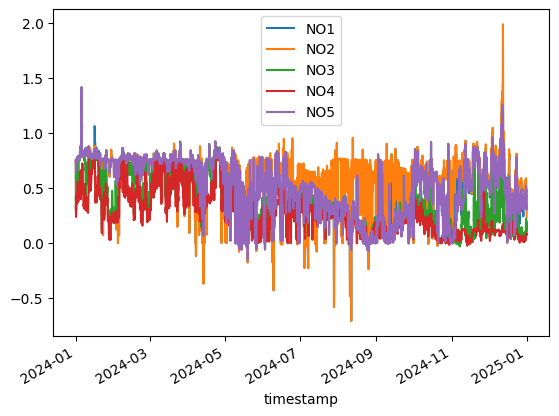

In [122]:
df_spot.plot()
df_strømstøtte.plot()

Text(0, 0.5, 'NOK')

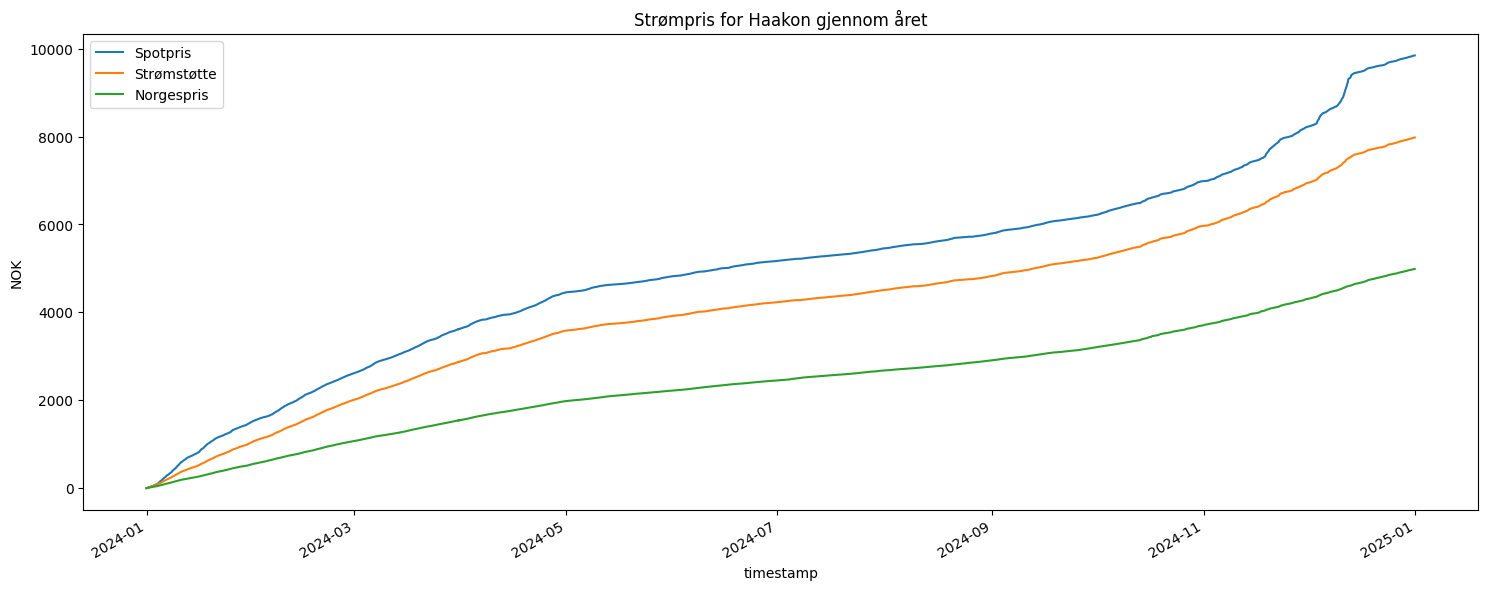

In [132]:
plt.figure(figsize=(18,7))
(df_spot['NO2']*ser).cumsum().plot(label='Spotpris')
(df_strømstøtte['NO2']*ser).cumsum().plot(label='Strømstøtte')
ser.mul(0.4).cumsum().plot(label='Norgespris')
plt.legend()
plt.title('Strømpris for Haakon gjennom året')
plt.ylabel('NOK')

In [135]:
(df_strømstøtte['NO2']*ser).sum()/(df_spot['NO2']*ser).sum()

np.float64(0.810320871916178)

In [138]:
ser.interpolate(inplace=True)

In [136]:
df_spot['NO2']

timestamp
2024-01-01 00:00:00    0.75419
2024-01-01 01:00:00    0.68675
2024-01-01 02:00:00    0.38488
2024-01-01 03:00:00    0.34324
2024-01-01 04:00:00    0.33665
                        ...   
2024-12-31 19:00:00    0.46006
2024-12-31 20:00:00    0.42421
2024-12-31 21:00:00    0.33798
2024-12-31 22:00:00    0.30760
2024-12-31 23:00:00    0.23485
Name: NO2, Length: 8784, dtype: float64

In [142]:
ser_strøm = df_strømstøtte['NO2']*ser
ser_spot = df_spot['NO2']*ser

In [257]:
ser_strøm.sum(), ser_spot.sum(), ser_spot.sum() - ser_strøm.sum()

(np.float64(7978.537414861),
 np.float64(9845.96903098),
 np.float64(1867.4316161190009))

In [ ]:
8 667 kr

Estimert pris med ny støtteordning (Norgespris):

6 236 kr

In [143]:
ser_strøm.sum()/ser.sum(), ser_spot.sum()/ser.sum() 

(np.float64(0.6397328325018357), np.float64(0.7894667066650493))

In [145]:
ser_strøm_rolling = ser_strøm.rolling('24h').sum() / ser.rolling('24h').sum()

<Axes: xlabel='timestamp'>

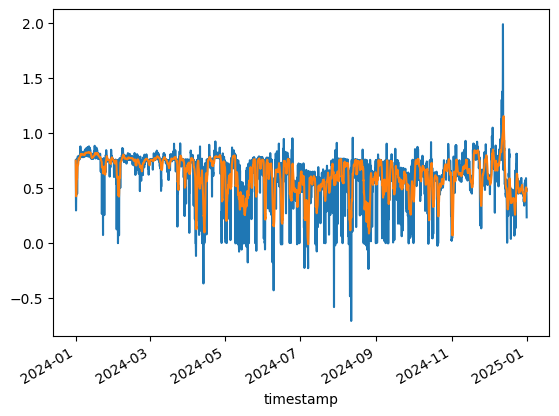

In [149]:
df_strømstøtte['NO2'].plot()
ser_strøm_rolling.plot()


In [152]:
ser_spot_rolling = ser_spot.rolling('24h').sum() / ser.rolling('24h').sum()

In [253]:
ser.loc['2024'].sum()

np.float64(12471.670999999998)

<Axes: xlabel='timestamp'>

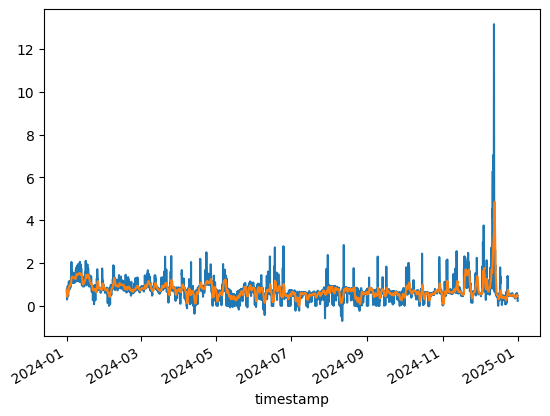

In [153]:
df_spot['NO2'].plot()
ser_spot_rolling.plot()


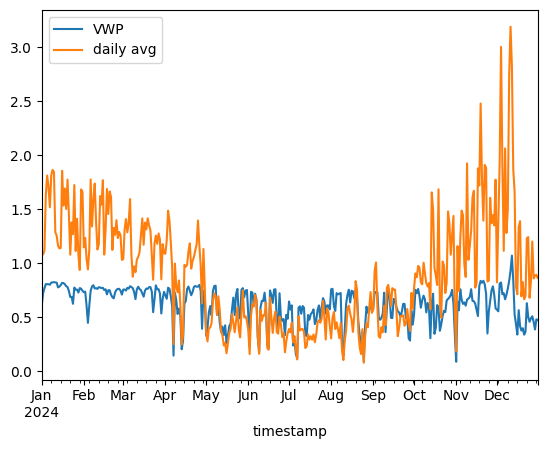

In [162]:
(ser_strøm.resample('d').mean()/ser.resample('d').mean()).plot(label='VWP')
ser_strøm.resample('d').mean().plot(label='daily avg')
plt.legend()

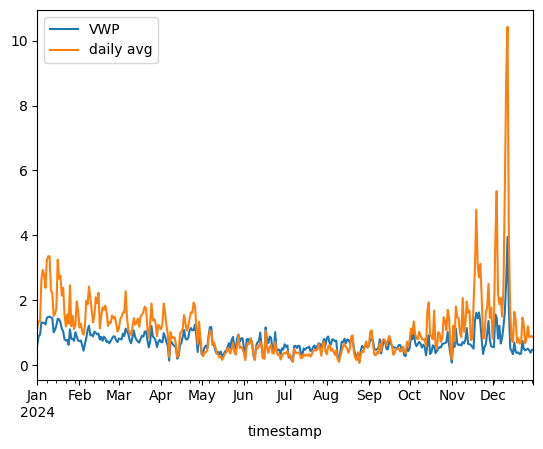

In [163]:
(ser_spot.resample('d').mean()/ser.resample('d').mean()).plot(label='VWP')
ser_spot.resample('d').mean().plot(label='daily avg')
plt.legend()

In [180]:
url = "https://api.elhub.no/energy-data/v0/price-areas?dataset=CONSUMPTION_PER_GROUP_MBA_HOUR&startDate=2023-01-01T00:00:00%2B02:00"

In [218]:
import requests
import json

In [183]:
res = requests.get(url)

In [186]:
res = res.json()

In [188]:
res.keys()

dict_keys(['data', 'links', 'meta'])

In [190]:
len(res['data'])

6

In [205]:
df_ = pd.DataFrame(res['data'][1]['attributes']['consumptionPerGroupMbaHour'])

In [217]:
res['data'][1]['attributes']['consumptionPerGroupMbaHour']

[{'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T01:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 108463,
  'priceArea': 'NO1',
  'quantityKwh': 134111.2,
  'startTime': '2023-01-01T00:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T02:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 108463,
  'priceArea': 'NO1',
  'quantityKwh': 134139.8,
  'startTime': '2023-01-01T01:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T03:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 108463,
  'priceArea': 'NO1',
  'quantityKwh': 131693.45,
  'startTime': '2023-01-01T02:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T04:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 108463,
  'priceArea': 'NO1',
  'quantityKwh': 130699.63,
  'startTime': '2023-01-01T03:00:00+01:00'},
 {

<Axes: xlabel='startTime'>

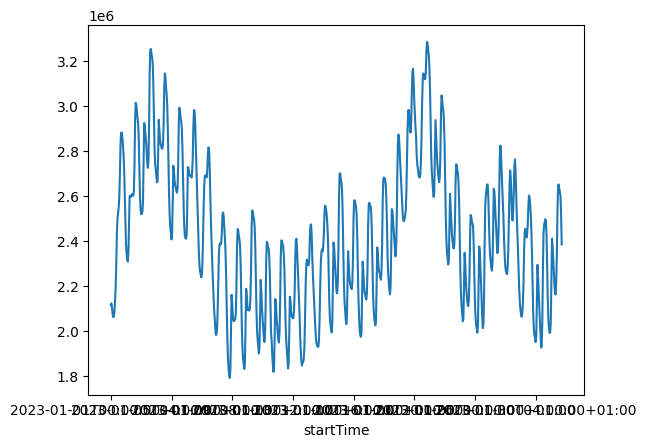

In [212]:
df_[df_['consumptionGroup'] == 'household'].set_index('startTime')['quantityKwh'].plot()

In [214]:
month_start = pd.date_range(start='2023-01-01', end='2025-01-01', freq='MS')
month_start

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
               '2025-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [229]:
def get_elhub_data(month):
    url = f"https://api.elhub.no/energy-data/v0/price-areas?dataset=CONSUMPTION_PER_GROUP_MBA_HOUR&startDate={month}T00:00:00%2B02:00"
    res = requests.get(url)
    res = res.json()
    return res

In [230]:
res = get_elhub_data(str(month_start[0].date()))

In [234]:
with open(f'pricezone_consumption/data_{str(month_start[0].date())}.json', 'w') as f:
    json.dump(res, f)

In [235]:
for month in month_start:
    res = get_elhub_data(str(month.date()))
    with open(f'pricezone_consumption/data_{str(month.date())}.csv', 'w') as f:
        json.dump(res, f)

In [ ]:
url = "https://api.elhub.no/energy-data/v0/price-areas?dataset=CONSUMPTION_PER_GROUP_MBA_HOUR&startDate=2023-01-01T00:00:00%2B02:00"

In [237]:
list(Path('pricezone_consumption').glob('*.csv'))

[WindowsPath('pricezone_consumption/data_2023-01-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-02-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-03-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-04-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-05-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-06-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-07-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-08-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-09-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-10-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-11-01.csv'),
 WindowsPath('pricezone_consumption/data_2023-12-01.csv'),
 WindowsPath('pricezone_consumption/data_2024-01-01.csv'),
 WindowsPath('pricezone_consumption/data_2024-02-01.csv'),
 WindowsPath('pricezone_consumption/data_2024-03-01.csv'),
 WindowsPath('pricezone_consumption/data_2024-04-01.csv'),
 WindowsPath('pricezone_consumption/data_2024-05-01.csv'

In [ ]:
with open('pricezone_consumption/data_2023-01-01.csv', 'r') as f:
    res = json.load(f)

In [297]:
data = {}
for fp in list(Path('pricezone_consumption').glob('*.csv')):
    with open(fp, 'r') as f:
        res = json.load(f)
    for k in res['data']:
        pricezone = k['id']
        if pricezone != '*':
            cons = pd.DataFrame(k['attributes']['consumptionPerGroupMbaHour'])
            data.setdefault(pricezone, []).append(cons)
for k,v in data.items():
    data[k] = pd.concat(v, axis=0)

In [300]:
data2 = {}
for k,v in data.items():
    data2[k] = v.loc[v['consumptionGroup'].eq('household')].copy()
    data2[k]['startTime'] = pd.to_datetime(data2[k]['startTime'])
    data2[k].set_index('startTime', inplace=True)
    data2[k][k] = data2[k]['quantityKwh'] / data2[k]['meteringPointCount']


C:\Users\HaakonKarlsen\AppData\Local\Temp\ipykernel_12380\1595476596.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data2[k]['startTime'] = pd.to_datetime(data2[k]['startTime'])
C:\Users\HaakonKarlsen\AppData\Local\Temp\ipykernel_12380\1595476596.py:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data2[k]['startTime'] = pd.to_datetime(data2[k]['startTime'])
C:\Users\HaakonKarlsen\AppData\Local\Temp\ipykernel_12380\1595476596.py:4: FutureW

In [306]:
dfzone = pd.concat([v[k] for k,v in data2.items()], axis=1)


In [334]:
dfzone

,startTime,NO1,NO2,NO3,NO4,NO5
0,2023-01-01 00:00:00+01:00,1.959496,1.993955,2.169251,2.587929,1.943750
1,2023-01-01 01:00:00+01:00,1.966995,2.020958,2.168491,2.571939,1.960444
2,2023-01-01 02:00:00+01:00,1.948329,2.003713,2.114743,2.516930,1.939965
3,2023-01-01 03:00:00+01:00,1.922025,1.962581,2.059432,2.464783,1.916913
4,2023-01-01 04:00:00+01:00,1.910464,1.935771,2.030482,2.428402,1.902773
...,...,...,...,...,...,...
18283,2025-01-31 19:00:00+01:00,2.625165,2.592478,2.642027,3.017304,2.445940
18284,2025-01-31 20:00:00+01:00,2.569832,2.552725,2.601764,2.962143,2.408040
18285,2025-01-31 21:00:00+01:00,2.512809,2.508656,2.544187,2.897982,2.361957
18286,2025-01-31 22:00:00+01:00,2.484818,2.478686,2.479140,2.839843,2.347214


In [312]:
dfzone.to_csv('pricezone_consumption/pricezone_consumption.csv', index=True, header=True)

<Axes: xlabel='startTime'>

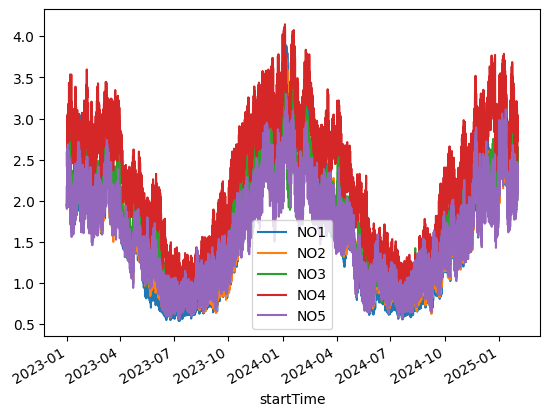

In [309]:
dfzone.plot()

In [289]:
test = data['NO2'].loc[data['NO1']['consumptionGroup'].eq('household')].copy()

In [290]:
test['avg'] = test['quantityKwh'] / test['meteringPointCount']

In [291]:
test['startTime'] = pd.to_datetime(test['startTime'])

C:\Users\HaakonKarlsen\AppData\Local\Temp\ipykernel_12380\2415167542.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  test['startTime'] = pd.to_datetime(test['startTime'])


In [295]:
test.set_index('startTime')['avg'].sort_index()

startTime
2023-01-01 00:00:00+01:00    1.993955
2023-01-01 01:00:00+01:00    2.020958
2023-01-01 02:00:00+01:00    2.003713
2023-01-01 03:00:00+01:00    1.962581
2023-01-01 04:00:00+01:00    1.935771
                               ...   
2025-01-31 19:00:00+01:00    2.592478
2025-01-31 20:00:00+01:00    2.552725
2025-01-31 21:00:00+01:00    2.508656
2025-01-31 22:00:00+01:00    2.478686
2025-01-31 23:00:00+01:00    2.443089
Name: avg, Length: 18288, dtype: float64

<Axes: xlabel='timestamp'>

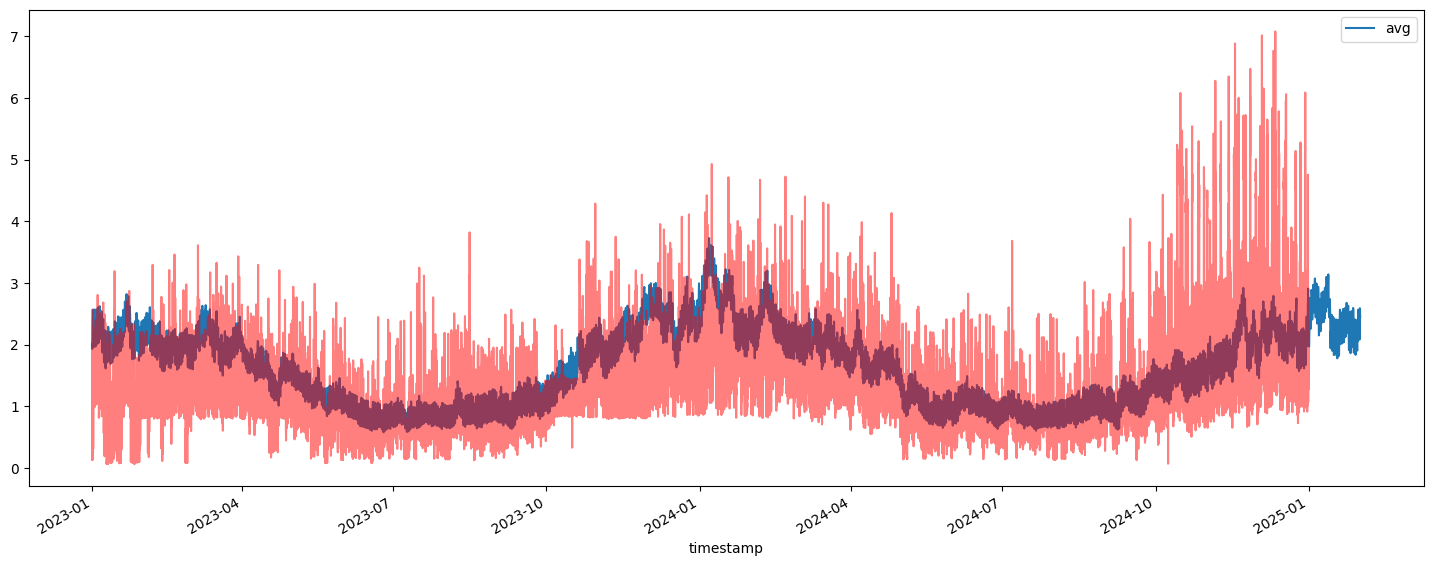

In [292]:
fig, ax = plt.subplots(figsize=(18,7))
test.plot(x='startTime', y='avg', ax=ax)
ser.plot(ax=ax, alpha=0.5, color='red')


In [339]:
dfzone['startTime'] = pd.to_datetime(dfzone['startTime'], utc=True)

In [343]:
dfzone.set_index('startTime', inplace=True)

In [345]:
dfzone.index = dfzone.index.tz_convert('Europe/Oslo')

In [347]:
dfzone.sort_index(inplace=True)

DatetimeIndex(['2023-01-01 00:00:00+01:00', '2023-01-01 01:00:00+01:00',
               '2023-01-01 02:00:00+01:00', '2023-01-01 03:00:00+01:00',
               '2023-01-01 04:00:00+01:00', '2023-01-01 05:00:00+01:00',
               '2023-01-01 06:00:00+01:00', '2023-01-01 07:00:00+01:00',
               '2023-01-01 08:00:00+01:00', '2023-01-01 09:00:00+01:00',
               ...
               '2024-12-31 15:00:00+01:00', '2024-12-31 16:00:00+01:00',
               '2024-12-31 17:00:00+01:00', '2024-12-31 18:00:00+01:00',
               '2024-12-31 19:00:00+01:00', '2024-12-31 20:00:00+01:00',
               '2024-12-31 21:00:00+01:00', '2024-12-31 22:00:00+01:00',
               '2024-12-31 23:00:00+01:00', '2025-01-01 00:00:00+01:00'],
              dtype='datetime64[ns, Europe/Oslo]', length=17545, freq='h')

In [352]:
dfzone_2 = dfzone.loc['2023':'2024'].reindex(pd.date_range(start='2023-01-01', end='2025-01-01', freq='h', tz='Europe/Oslo')[:-1])

In [362]:
dfzone_2.index = dfzone_2.index.tz_localize(None)

In [363]:
dfzone_2.to_excel('pricezone_consumption/pricezone_consumption_2023-2024_2.xlsx', index=True, header=True)

In [249]:
k['attributes']['consumptionPerGroupMbaHour']

[{'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T01:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 45374,
  'priceArea': 'NO5',
  'quantityKwh': 61463.492,
  'startTime': '2023-01-01T00:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T02:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 45374,
  'priceArea': 'NO5',
  'quantityKwh': 61909.805,
  'startTime': '2023-01-01T01:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T03:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 45374,
  'priceArea': 'NO5',
  'quantityKwh': 60907.996,
  'startTime': '2023-01-01T02:00:00+01:00'},
 {'consumptionGroup': 'cabin',
  'endTime': '2023-01-01T04:00:00+01:00',
  'lastUpdatedTime': '2025-03-28T21:57:36+01:00',
  'meteringPointCount': 45374,
  'priceArea': 'NO5',
  'quantityKwh': 60185.66,
  'startTime': '2023-01-01T03:00:00+01:00'},
 {'co

In [316]:
df_tot = pd.read_excel('Data.xlsx', sheet_name='Forbruk')

In [321]:
dfzone.reset_index(inplace=True)

In [318]:
df_tot.set_index('Dato')

,Time,Profil A,Profil B
Dato,,,
2023-01-01,1,0.22,0.966
2023-01-01,2,0.16,2.564
2023-01-01,3,0.15,0.332
2023-01-01,4,0.20,0.130
2023-01-01,5,0.71,0.141
...,...,...,...
2024-12-31,20,2.92,1.929
2024-12-31,21,2.60,1.384
2024-12-31,22,1.70,1.287
